In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
from keras.preprocessing import image
# import tensorflow as tf
import matplotlib.pyplot as plt

## Submission Code

In [26]:
test_path = "/kaggle/input/visual-taxonomy/test.csv"
submission_path = "/kaggle/input/visual-taxonomy/sample_submission.csv"

test_df = pd.read_csv(test_path)
# test_df[test_df['Category'] == 'Men Tshirts'].shape
test_df

,id,Category
0,0,Men Tshirts
1,1,Men Tshirts
2,2,Men Tshirts
3,3,Men Tshirts
4,4,Men Tshirts
...,...,...
30200,30484,Women Tops & Tunics
30201,30485,Women Tops & Tunics
30202,30486,Women Tops & Tunics
30203,30487,Women Tops & Tunics


In [13]:
category_df = pd.read_parquet("/kaggle/input/visual-taxonomy/category_attributes.parquet")
category_df

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [165]:
sample_submission_df = pd.read_csv(submission_path)
sample_submission_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,47001,Women Tshirts,8,maroon,regular,crop,printed,typography,short sleeves,regular sleeves,default,nu,nu
1,16431,Sarees,10,same as saree\n,temple border,small border,cream,party,jacquard,woven design,zari woven,ethnic motif,no
2,55700,Women Tops & Tunics,10,white,fitted,regular,round neck,casual,solid,solid,short sleeves,regular sleeves,knitted
3,15698,Sarees,10,same as saree\n,zari,small border,white,party,jacquard,woven design\n,zari woven,floral,no
4,30330,Kurtis,9,yellow,a-line,knee length\n,daily,net,default,solid,three-quarter sleeves,regular,nu


## Preparing X dataset

In [23]:
image_directory = "/kaggle/input/visual-taxonomy/test_images"
SIZE = 200

def prepare_X(X, category):
    for i in test_df[test_df['Category'] == category].id:
        prep=str(i)
        prep = '0'*(6-len(prep)) + prep
        img = image.load_img(image_directory + "/" + prep+'.jpg', target_size=(SIZE,SIZE,3))
        img = image.img_to_array(img)
        img = img/255.
        X.append(img)
    X = np.array(X)
    return X

In [24]:
X_men_tshirts = []
X_men_tshirts = prepare_X(X_men_tshirts, 'Men Tshirts')
X_men_tshirts.shape

(3787, 200, 200, 3)

In [27]:
X_sarees = []
X_sarees = prepare_X(X_sarees, 'Sarees')
X_sarees.shape

(7102, 200, 200, 3)

In [28]:
X_women_tshirts = []
X_women_tshirts = prepare_X(X_women_tshirts, 'Women Tshirts')
X_women_tshirts.shape

(9931, 200, 200, 3)

In [29]:
X_women_tops = []
X_women_tops =  prepare_X(X_women_tops, 'Women Tops & Tunics')
X_women_tops.shape

(6925, 200, 200, 3)

In [64]:
X_kurtis = []
X_kurtis = prepare_X(X_kurtis, 'Kurtis')
X_kurtis.shape

(2460, 200, 200, 3)

## Loading Models

In [36]:
from tensorflow.keras.models import load_model

In [134]:
import json
def get_attributes_mappings(attribute_mappings_path):
    with open(attribute_mappings_path, 'r') as file:
        attribute_mappings = json.load(file)
    return attribute_mappings

In [136]:
def get_predictions(category_predictions, attribute_mappings):
    predictions = []
    for i, prediction in enumerate(category_predictions):
        
        attr_name = f"attr_{i + 1}"
        predicted_indices = np.argmax(prediction, axis=1)
        
        # Look up the string value for the predicted index in the mappings
        predicted_values = [attribute_mappings[attr_name][str(predicted_index)] for predicted_index in predicted_indices]
        
        # Append the list of predicted values to attribute_prediction
        predictions.append(predicted_values)
    return predictions

## Sarees Model

In [112]:
sarees_model_path = "/kaggle/input/meesho-ds/MEESHO_DS/Sarees/checkpoint.model.keras"
sarees_model = load_model(sarees_model_path)
sarees_predictions = sarees_model.predict(X_sarees)

222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step


In [135]:
sarees_attribute_mappings_path = "/kaggle/input/meesho-ds/MEESHO_DS/Sarees/attribute_mappings.json"
sarees_attribute_mappings = get_attributes_mappings(sarees_attribute_mappings_path)

In [137]:
pred_sarees = get_predictions(sarees_predictions, sarees_attribute_mappings)

In [141]:
pred_sarees = np.array(pred_sarees)

In [150]:
pred_sarees.shape

(10, 7102)

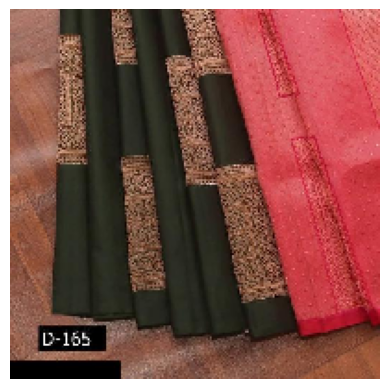

In [109]:
# Plot the test image
plt.imshow(X_sarees[1])
plt.axis('off')
plt.show()

## Kurtis Model

In [145]:
kurtis_model_path = "/kaggle/input/meesho-ds/MEESHO_DS/Kurtis/checkpoint.model (2).keras"
kurtis_model = load_model(kurtis_model_path)
kurtis_predictions = kurtis_model.predict(X_kurtis)

77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step


In [146]:
kurtis_attribute_mappings_path = "/kaggle/input/meesho-ds/MEESHO_DS/Kurtis/attribute_mappings (1).json"
kurtis_attribute_mappings = get_attributes_mappings(kurtis_attribute_mappings_path)

In [147]:
pred_kurtis = get_predictions(kurtis_predictions, kurtis_attribute_mappings)

In [148]:
pred_kurtis = np.array(pred_kurtis)

In [149]:
pred_kurtis.shape

(9, 2460)

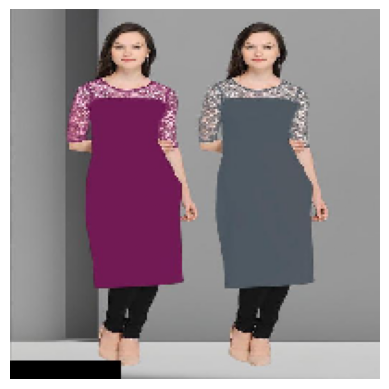

In [151]:
# Plot the test image
plt.imshow(X_kurtis[1])
plt.axis('off')
plt.show()

## Men Tshirts

In [152]:
men_tshirts_model_path = "/kaggle/input/meesho-ds/MEESHO_DS/Men_TShirts/checkpoint.model.keras"
men_tshirts_model = load_model(men_tshirts_model_path)
men_tshirts_predictions = men_tshirts_model.predict(X_men_tshirts)

119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step


In [153]:
men_tshirts_attribute_mappings_path = "/kaggle/input/meesho-ds/MEESHO_DS/Men_TShirts/attribute_mappings.json"
men_tshirts_attribute_mappings = get_attributes_mappings(men_tshirts_attribute_mappings_path)

In [154]:
pred_men_tshirts = get_predictions(men_tshirts_predictions, men_tshirts_attribute_mappings)

In [155]:
pred_men_tshirts = np.array(pred_men_tshirts)

In [157]:
pred_men_tshirts.shape

(5, 3787)

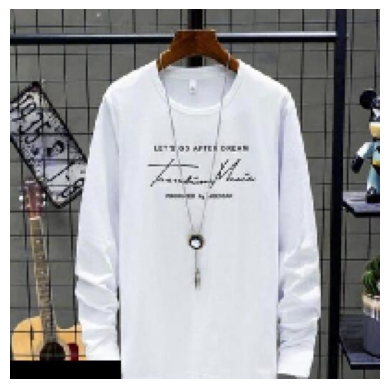

In [158]:
# Plot the test image
plt.imshow(X_men_tshirts[1])
plt.axis('off')
plt.show()

## Women_tshirt

In [160]:
women_tshirts_model_path = "/kaggle/input/meesho-ds/MEESHO_DS/Women_shirt/checkpoint.model (1).keras"
women_tshirts_model = load_model(women_tshirts_model_path)
women_tshirts_predictions = women_tshirts_model.predict(X_women_tshirts)

women_tshirts_attribute_mappings_path = "/kaggle/input/meesho-ds/MEESHO_DS/Women_shirt/attribute_mappings (1).json"
women_tshirts_attribute_mappings = get_attributes_mappings(women_tshirts_attribute_mappings_path)

pred_women_tshirts = get_predictions(women_tshirts_predictions, women_tshirts_attribute_mappings)
pred_women_tshirts = np.array(pred_women_tshirts)

print(pred_women_tshirts.shape)

311/311 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step
(8, 9931)


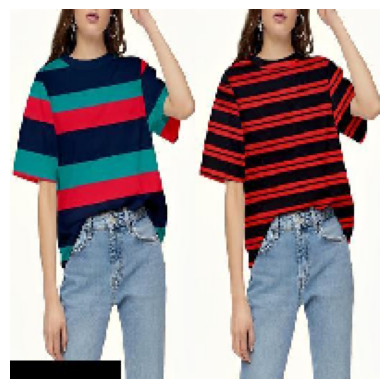

In [159]:
# Plot the test image
plt.imshow(X_women_tshirts[1])
plt.axis('off')
plt.show()

## Women Tops and Tunics

In [161]:
women_tops_model_path = "/kaggle/input/meesho-ds/MEESHO_DS/Women_Tops/checkpoint.model.keras"
women_tops_model = load_model(women_tops_model_path)
women_tops_predictions = women_tops_model.predict(X_women_tops)

women_tops_attribute_mappings_path = "/kaggle/input/meesho-ds/MEESHO_DS/Women_Tops/attribute_mappings.json"
women_tops_attribute_mappings = get_attributes_mappings(women_tops_attribute_mappings_path)

pred_women_tops = get_predictions(women_tops_predictions, women_tops_attribute_mappings)
pred_women_tops = np.array(pred_women_tops)

print(pred_women_tops.shape)

217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step
(10, 6925)


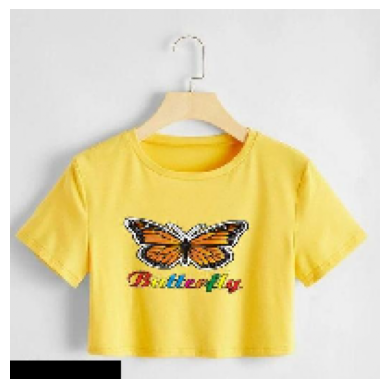

In [162]:
# Plot the test image
plt.imshow(X_women_tops[1])
plt.axis('off')
plt.show()

In [163]:
test_df

,id,Category
0,0,Men Tshirts
1,1,Men Tshirts
2,2,Men Tshirts
3,3,Men Tshirts
4,4,Men Tshirts
...,...,...
30200,30484,Women Tops & Tunics
30201,30485,Women Tops & Tunics
30202,30486,Women Tops & Tunics
30203,30487,Women Tops & Tunics


In [167]:
sample_submission_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,47001,Women Tshirts,8,maroon,regular,crop,printed,typography,short sleeves,regular sleeves,default,nu,nu
1,16431,Sarees,10,same as saree\n,temple border,small border,cream,party,jacquard,woven design,zari woven,ethnic motif,no
2,55700,Women Tops & Tunics,10,white,fitted,regular,round neck,casual,solid,solid,short sleeves,regular sleeves,knitted
3,15698,Sarees,10,same as saree\n,zari,small border,white,party,jacquard,woven design\n,zari woven,floral,no
4,30330,Kurtis,9,yellow,a-line,knee length\n,daily,net,default,solid,three-quarter sleeves,regular,nu


## Creating Submission DF

In [193]:
# Create a list to hold the submission data
submission_data = []

# Function to prepare the submission rows for each category
def add_to_submission(image_ids, category, predictions):
    for i, img_id in enumerate(image_ids):
        # Get attributes for the current image ID
        attrs = predictions[:, i] if i < predictions.shape[1] else []
        num_attrs = len(attrs)
        # Fill with "nu" for attributes beyond the available predictions
        attrs = attrs.tolist() + ["nu"] * (10 - len(attrs))
        
        # Prepare the row
        submission_data.append([img_id, category, num_attrs] + attrs)

In [194]:
# Extract image IDs for each category from test_df

men_tshirts_ids = test_df[test_df['Category'] == 'Men Tshirts']['id'].values
sarees_ids = test_df[test_df['Category'] == 'Sarees']['id'].values
kurtis_ids = test_df[test_df['Category'] == 'Kurtis']['id'].values
women_tshirts_ids = test_df[test_df['Category'] == 'Women Tshirts']['id'].values
women_tops_ids = test_df[test_df['Category'] == 'Women Tops & Tunics']['id'].values

In [195]:
# Add each category's predictions to the submission data
add_to_submission(men_tshirts_ids, 'Men Tshirts', pred_men_tshirts)
add_to_submission(sarees_ids, 'Sarees', pred_sarees)
add_to_submission(kurtis_ids, 'Kurtis', pred_kurtis)
add_to_submission(women_tshirts_ids, 'Women Tshirts', pred_women_tshirts)
add_to_submission(women_tops_ids, 'Women Tops & Tunics', pred_women_tops)

In [196]:
# Create the final submission DataFrame
submission_df = pd.DataFrame(submission_data, columns=['id', 'Category', 'len', 'attr_1', 'attr_2', 'attr_3', 
                                                        'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 
                                                        'attr_9', 'attr_10'])

In [197]:
# Display the submission DataFrame
submission_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,0,Men Tshirts,5,default,round,solid,typography,short sleeves,nu,nu,nu,nu,nu
1,1,Men Tshirts,5,white,round,printed,default,short sleeves,nu,nu,nu,nu,nu
2,2,Men Tshirts,5,white,round,printed,typography,short sleeves,nu,nu,nu,nu,nu
3,3,Men Tshirts,5,white,round,solid,solid,short sleeves,nu,nu,nu,nu,nu
4,4,Men Tshirts,5,black,round,solid,typography,short sleeves,nu,nu,nu,nu,nu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30200,30484,Women Tops & Tunics,10,green,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,waist tie-ups
30201,30485,Women Tops & Tunics,10,yellow,regular,regular,v-neck,party,solid,typography,three-quarter sleeves,puff sleeves,waist tie-ups
30202,30486,Women Tops & Tunics,10,yellow,regular,regular,v-neck,party,solid,typography,three-quarter sleeves,sleeveless,knitted
30203,30487,Women Tops & Tunics,10,yellow,regular,regular,v-neck,casual,solid,default,three-quarter sleeves,sleeveless,waist tie-ups


In [198]:
# Save the submission DataFrame to the Kaggle working directory
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

# Optionally, display a message to confirm that the file has been saved
print("Submission file saved to /kaggle/working/submission.csv")


Submission file saved to /kaggle/working/submission.csv
